In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance
%config IPCompleter.greedy=True

## UPLOAD DATASETS

In [168]:
path = '../../'

In [169]:
name_df = 'df_tablon.pickle'

In [170]:
df = pd.read_pickle(path +'/02_Data/03_Work/' + name_df)

In [171]:
df

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTHER,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTHER,fuente_Organic Search,fuente_Reference,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,visitas_total_mms,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_actividad_mms,score_perfil_mms,compra
id,,,,,,,,,,,,,,,,,,,,,
660737,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.00,0.000000,0.000,0.727273,0.444444,0
660728,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.10,0.296655,0.125,0.727273,0.444444,0
660727,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.04,0.674296,0.100,0.636364,1.000000,1
660719,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.02,0.134243,0.050,0.545455,0.666667,0
660681,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.04,0.628521,0.050,0.727273,0.777778,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579717,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.08,0.855634,0.100,0.636364,0.666667,1
579712,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.26,0.539613,0.325,0.727273,1.000000,1
579701,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.04,0.382923,0.100,0.545455,1.000000,0


### Separate X and Y

In [172]:
target = 'compra'
x = df.drop(columns = target).copy()
y =  df[target].copy()

### Permutation Importance

In [173]:
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

#### FIT

In [174]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBClassifier(use_label_encoder=False, n_jobs = -1, eval_metric='auc')

xgb.fit(x,y)

permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'roc_auc',
                                     n_repeats=5, n_jobs = -1)

C:\Users\luise\anaconda3\envs\leadscoring\Lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


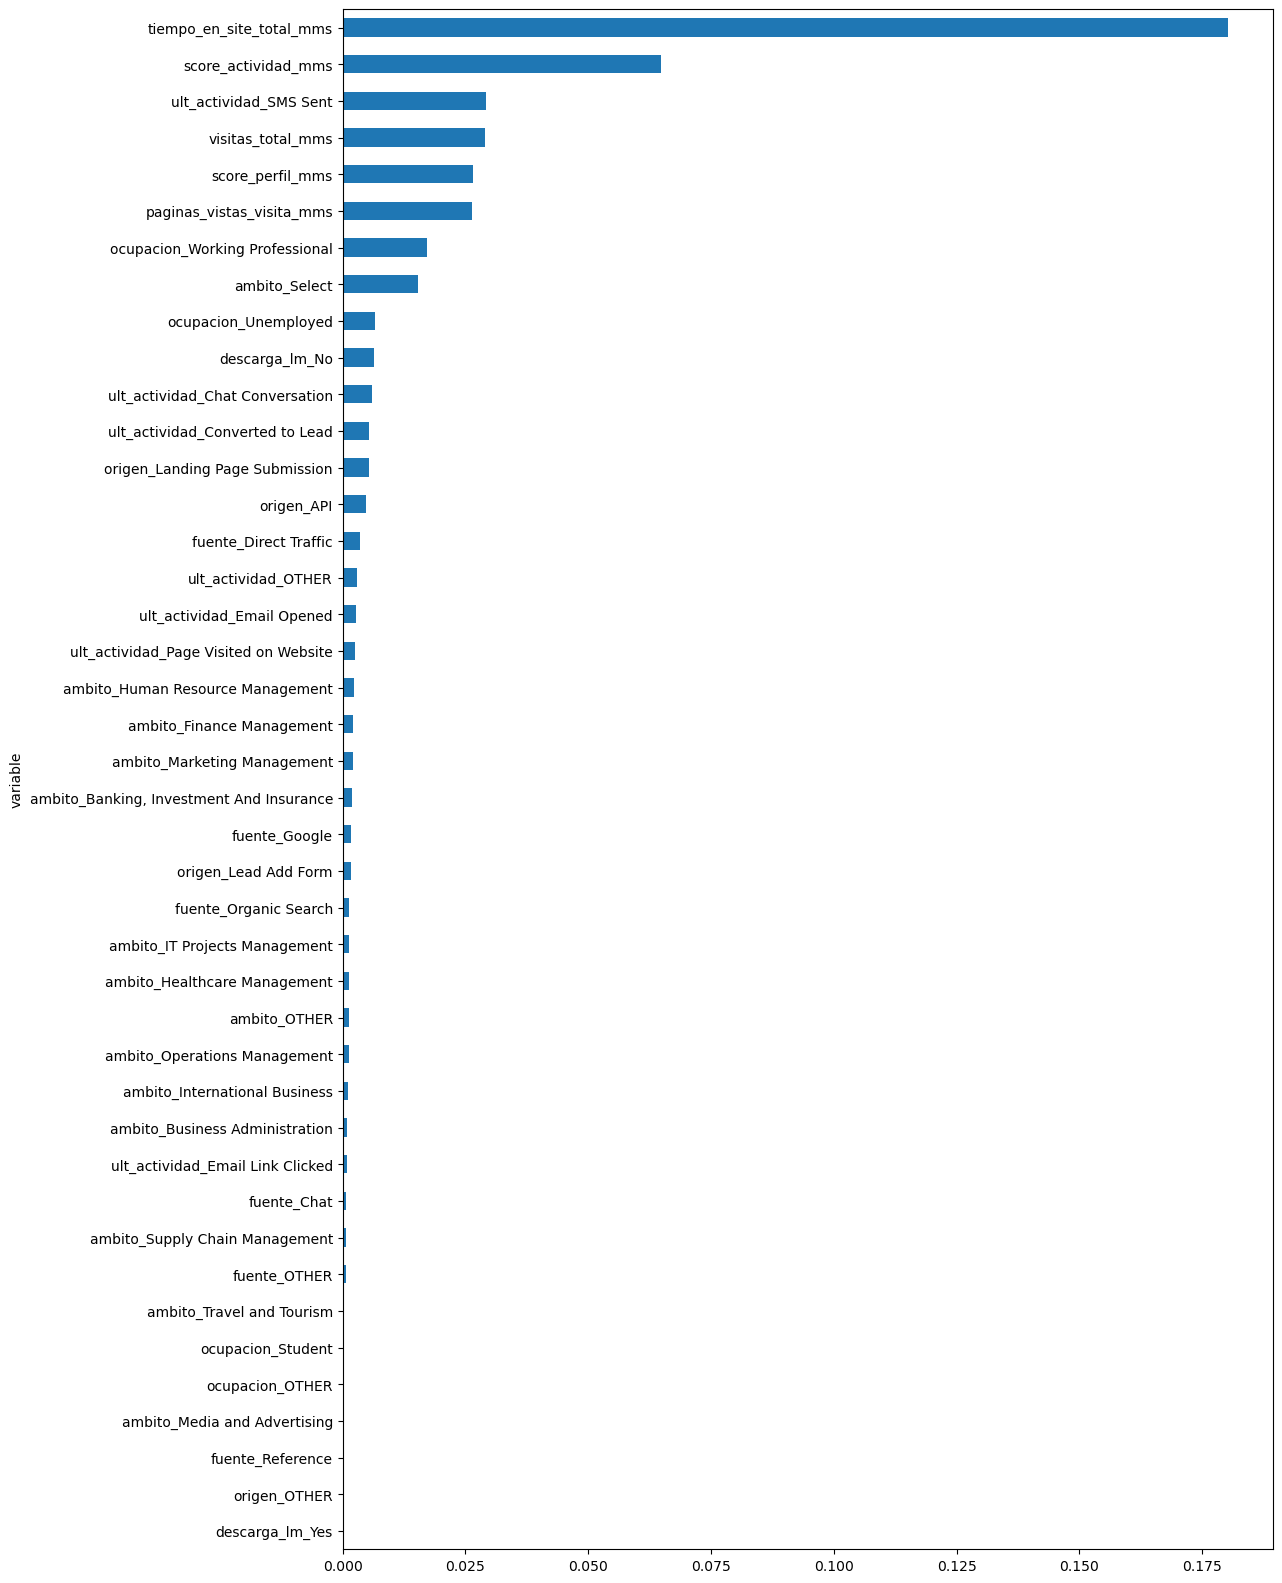

In [175]:
rank_per = ranking_per(x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,20));

Shoose Rank of Variables to use

In [176]:
posicition_variable_limit = 16

In [178]:
in_per = rank_per.iloc[0:posicition_variable_limit].variable

In [179]:
in_per

38           tiempo_en_site_total_mms
40                score_actividad_mms
16             ult_actividad_SMS Sent
37                  visitas_total_mms
41                   score_perfil_mms
39          paginas_vistas_visita_mms
34     ocupacion_Working Professional
28                      ambito_Select
33               ocupacion_Unemployed
35                     descarga_lm_No
10    ult_actividad_Chat Conversation
11    ult_actividad_Converted to Lead
1      origen_Landing Page Submission
0                          origen_API
5               fuente_Direct Traffic
14                ult_actividad_OTHER
Name: variable, dtype: object

In [180]:
x_per = x[in_per].copy()

In [181]:
x_per

,tiempo_en_site_total_mms,score_actividad_mms,ult_actividad_SMS Sent,visitas_total_mms,score_perfil_mms,paginas_vistas_visita_mms,ocupacion_Working Professional,ambito_Select,ocupacion_Unemployed,descarga_lm_No,ult_actividad_Chat Conversation,ult_actividad_Converted to Lead,origen_Landing Page Submission,origen_API,fuente_Direct Traffic,ult_actividad_OTHER
id,,,,,,,,,,,,,,,,
660737,0.000000,0.727273,0.0,0.00,0.444444,0.000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
660728,0.296655,0.727273,0.0,0.10,0.444444,0.125,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
660727,0.674296,0.636364,0.0,0.04,1.000000,0.100,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
660719,0.134243,0.545455,0.0,0.02,0.666667,0.050,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
660681,0.628521,0.727273,0.0,0.04,0.777778,0.050,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579717,0.855634,0.636364,1.0,0.08,0.666667,0.100,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
579712,0.539613,0.727273,1.0,0.26,1.000000,0.325,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
579701,0.382923,0.545455,0.0,0.04,1.000000,0.100,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [182]:
x_shortlisted = x_per

## Unsupervided Metod

### Correlation

#### Function to show the results

In [183]:
def strong_correlation(df, lower_lim = 0.3, upper_lim = 1,drop_dupli=True):
    #correlation
    c = df.corr().abs()
    c= c.unstack()
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    #Filter
    c = c.loc[(c['corr'] > lower_lim) &  (c['corr'] < upper_lim),:].sort_values(by = 'corr', ascending=False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

#### View

In [184]:
final_corr = strong_correlation(x_shortlisted)

In [185]:
final_corr.var1.value_counts()

descarga_lm_No                    4
fuente_Direct Traffic             3
origen_API                        2
score_perfil_mms                  2
ocupacion_Working Professional    1
ambito_Select                     1
origen_Landing Page Submission    1
visitas_total_mms                 1
paginas_vistas_visita_mms         1
Name: var1, dtype: int64

##### Review in detail

In [186]:
final_corr.head(50)

,var1,var2,corr
220,origen_API,origen_Landing Page Submission,0.878262
104,ocupacion_Working Professional,ocupacion_Unemployed,0.852007
125,ambito_Select,origen_API,0.703799
199,origen_Landing Page Submission,ambito_Select,0.681127
158,descarga_lm_No,fuente_Direct Traffic,0.582756
53,visitas_total_mms,paginas_vistas_visita_mms,0.550368
156,descarga_lm_No,origen_Landing Page Submission,0.513621
236,fuente_Direct Traffic,origen_Landing Page Submission,0.462068
212,origen_API,score_perfil_mms,0.448303
157,descarga_lm_No,origen_API,0.447465


#### Drop the variables that have a strog correlation and a low predict level.

In [187]:
to_drop_corr = ['origen_API','origen_Landing Page Submission']

In [188]:
x_shortlisted.drop(columns =to_drop_corr, inplace = True)

In [189]:
x_shortlisted.columns.to_list()

['tiempo_en_site_total_mms',
 'score_actividad_mms',
 'ult_actividad_SMS Sent',
 'visitas_total_mms',
 'score_perfil_mms',
 'paginas_vistas_visita_mms',
 'ocupacion_Working Professional',
 'ambito_Select',
 'ocupacion_Unemployed',
 'descarga_lm_No',
 'ult_actividad_Chat Conversation',
 'ult_actividad_Converted to Lead',
 'fuente_Direct Traffic',
 'ult_actividad_OTHER']

## SAVE DATASET AFTER VARIABLES SELECTION 

In [190]:
name_x_selected = path + '/02_Data/03_Work/' + 'x_selected.pickle'
name_y_selected = path + '/02_Data/03_Work/' + 'y_selected.pickle'

In [191]:
#save files
x_shortlisted.to_pickle(name_x_selected)

y_shortlisted = y.copy()
y_shortlisted.to_pickle(name_y_selected)

In [192]:
#save final variables
final_variable_names = path + '/05_Results/' + 'final_variables.pickle'

x_shortlisted.iloc[0].to_pickle(final_variable_names)